# V Venkata Manoj
# B1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'2.2.2'

In [3]:
import pandas as pd

# Loading all uploaded CSV files
train = pd.read_csv("train.csv")
campaign_data = pd.read_csv("campaign_data.csv")
coupon_item_mapping = pd.read_csv("coupon_item_mapping.csv")
customer_demographics = pd.read_csv("customer_demographics.csv")
customer_transactions = pd.read_csv("customer_transaction_data.csv")
item_data = pd.read_csv("item_data.csv")

# Check initial shapes and head of each to understand structure
summary = {
    "train.csv": train.shape,
    "campaign_data.csv": campaign_data.shape,
    "coupon_item_mapping.csv": coupon_item_mapping.shape,
    "customer_demographics.csv": customer_demographics.shape,
    "customer_transaction_data.csv": customer_transactions.shape,
    "item_data.csv": item_data.shape
}

summary_df = pd.DataFrame(list(summary.items()), columns=["File", "Shape"])
summary_df

,File,Shape
0,train.csv,"(78369, 5)"
1,campaign_data.csv,"(28, 4)"
2,coupon_item_mapping.csv,"(92663, 2)"
3,customer_demographics.csv,"(760, 7)"
4,customer_transaction_data.csv,"(1324566, 7)"
5,item_data.csv,"(74066, 4)"


## Analyzing customer_demographics.csv

In [4]:
cus_demo=pd.read_csv("customer_demographics.csv")
cus_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [5]:
cus_demo.shape

(760, 7)

In [6]:
cus_demo.isnull().sum()

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

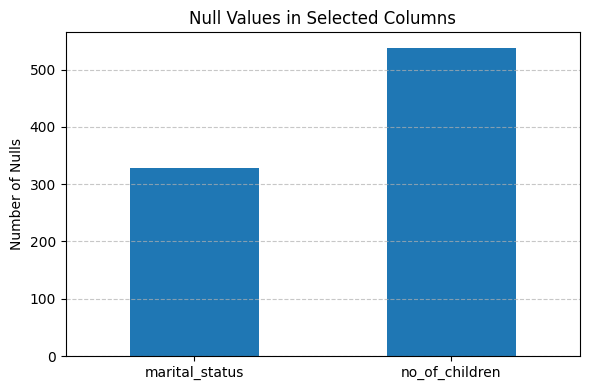

In [7]:
null_counts = cus_demo[['marital_status', 'no_of_children']].isnull().sum()

# Plotting
plt.figure(figsize=(6, 4))
null_counts.plot(kind='bar')
plt.title('Null Values in Selected Columns')
plt.ylabel('Number of Nulls')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
cus_demo.describe(include= 'O')


,age_range,marital_status,family_size,no_of_children
count,760,431,760,222
unique,6,2,5,3
top,46-55,Married,2,1
freq,271,317,303,107


-  As there are 6 unique number in the dataset we can convert them into ranges for easy interpretabilty
-  There are 2 unique marital_status married or single most of the dataset contains married.

In [9]:
def fill_with_group_mode(row):
    if pd.isnull(row['marital_status']):
        age_group = row['age_range']
        mode_val = cus_demo[cus_demo['age_range'] == age_group]['marital_status'].mode()
        if not mode_val.empty:
            return mode_val.iloc[0]
    return row['marital_status']

cus_demo['marital_status'] = cus_demo.apply(fill_with_group_mode, axis=1)

-  We filled ,arrital_status with mode of that age group as this is a categorical column.

In [10]:
cus_demo.isnull().sum()

customer_id         0
age_range           0
marital_status      0
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

In [11]:
cus_demo.dtypes

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

In [12]:
# Removing '+' symbol and convert the 'family_size' column to numeric
cus_demo['family_size'] = pd.to_numeric(cus_demo['family_size'].str.replace('+', ''), errors='coerce')
print(cus_demo['family_size'].dtype)


int64


In [13]:
# Removing '+' symbol and convert the 'family_size' column to numeric
cus_demo['no_of_children'] = pd.to_numeric(cus_demo['no_of_children'].str.replace('+', ''), errors='coerce')
print(cus_demo['no_of_children'].dtype)

float64


In [14]:
cus_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,Married,0,3,1.0,3
3,8,26-35,Married,0,4,2.0,6
4,10,46-55,Single,0,1,NaN,5


In [15]:
median_no_of_children = cus_demo['no_of_children'].median()  


cus_demo.loc[ 
             (cus_demo['no_of_children'].isnull()), 'no_of_children'] = median_no_of_children

- we filled the missing number of children using the median.

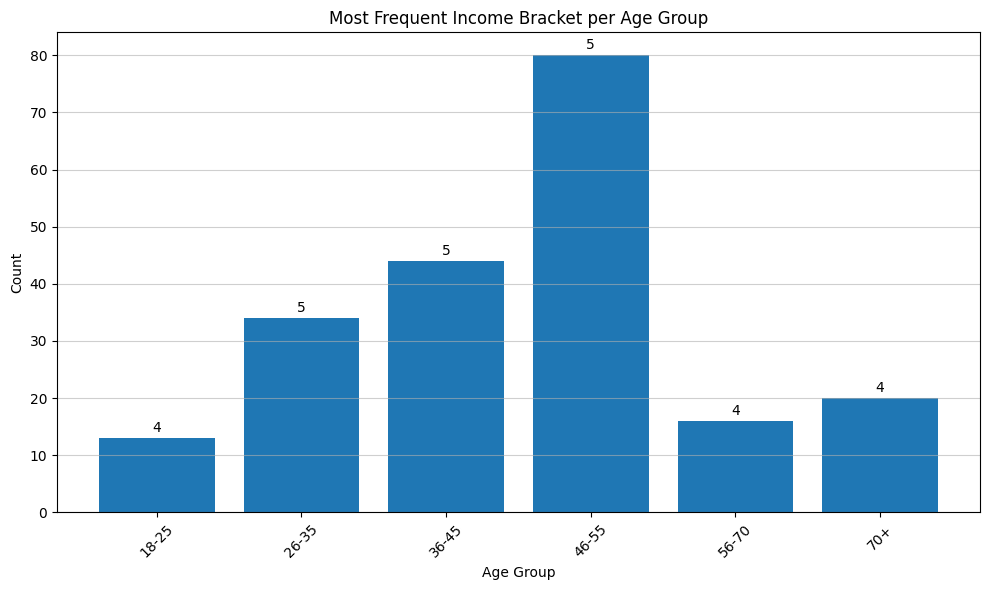

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by age_range and income_bracket to count occurrences
count_df = cus_demo.groupby(['age_range', 'income_bracket']).size().reset_index(name='count')


top_income = count_df.sort_values(['age_range', 'count'], ascending=[True, False]).drop_duplicates('age_range')

top_income = top_income.sort_values('age_range')

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_income['age_range'], top_income['count'])

# Add income bracket labels on top of each bar
for bar, label in zip(bars, top_income['income_bracket']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, label, ha='center', fontsize=10)

plt.title("Most Frequent Income Bracket per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()


- The data contains age group between 46-55

In [17]:
age_map = {
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-55': 4,
    '56-70': 5,
    '70+': 6
}


cus_demo['age_range'] = cus_demo['age_range'].map(age_map)

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cus_demo['marital_status'] = le.fit_transform(cus_demo['marital_status'])

In [19]:
cus_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,6,0,0,2,2.0,4
1,6,4,0,0,2,2.0,5
2,7,2,0,0,3,1.0,3
3,8,2,0,0,4,2.0,6
4,10,4,1,0,1,2.0,5


## Train.csv

In [20]:
train_df=pd.read_csv("train.csv")
train_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [21]:
train_df.shape

(78369, 5)

In [22]:
train_customers = set(train_df['customer_id'])
demo_customers = set(cus_demo['customer_id'])

# Customers in train that are missing from demographics
missing_customers = train_customers - demo_customers

print("Missing customers in demographics:", len(missing_customers))

Missing customers in demographics: 725


- The data of customers present in training.csv but missing in demographics dataset is 725

In [23]:
train_customers = set(train_df['customer_id'].unique())
demo_customers = set(cus_demo['customer_id'].unique())

# Customers in train but missing in demographics
missing_customers = train_customers - demo_customers

print(f"Number of customers missing in demographics: {len(missing_customers)}")
print(missing_customers)

Number of customers missing in demographics: 725
{3, 4, 5, 9, 16, 18, 20, 21, 23, 24, 25, 26, 32, 34, 37, 43, 44, 46, 47, 49, 50, 56, 57, 60, 61, 62, 63, 64, 65, 68, 70, 73, 77, 80, 81, 86, 88, 91, 95, 96, 98, 99, 100, 101, 102, 104, 106, 109, 111, 115, 116, 117, 118, 120, 121, 122, 125, 126, 127, 130, 133, 137, 139, 145, 146, 148, 152, 156, 157, 160, 164, 166, 169, 170, 171, 172, 173, 175, 176, 177, 181, 182, 183, 184, 187, 188, 190, 194, 196, 198, 200, 203, 206, 208, 210, 211, 213, 215, 216, 217, 218, 219, 220, 221, 222, 224, 229, 233, 234, 236, 240, 241, 244, 247, 254, 255, 256, 257, 260, 261, 263, 264, 270, 273, 274, 275, 278, 280, 285, 289, 290, 296, 299, 301, 302, 304, 305, 307, 309, 310, 311, 321, 324, 325, 326, 328, 330, 331, 332, 334, 337, 340, 341, 342, 344, 345, 346, 350, 351, 356, 358, 359, 360, 362, 364, 365, 366, 370, 372, 373, 376, 379, 380, 385, 387, 388, 394, 396, 403, 404, 405, 406, 407, 408, 409, 411, 412, 413, 417, 418, 419, 420, 424, 425, 426, 430, 432, 433, 435, 4

In [24]:
train_customers = set(train_df['customer_id'].unique())
demo_customers = set(cus_demo['customer_id'].unique())

missing_customers = train_customers - demo_customers
print(f"Total unique customers in train: {len(train_customers)}")
print(f"Total customers in demographics: {len(demo_customers)}")
print(f"Customers missing demographics: {len(missing_customers)}")


Total unique customers in train: 1428
Total customers in demographics: 760
Customers missing demographics: 725


In [25]:
# Convert IDs to the same type (e.g., string) to avoid mismatch due to type differences
train_customers = set(train_df['customer_id'].astype(str).unique())
demo_customers = set(cus_demo['customer_id'].astype(str).unique())

# Customers in demographics but NOT in train
demo_not_in_train = demo_customers - train_customers

print(f"Customers in demographics but not in train: {len(demo_not_in_train)}")
print("Example:", list(demo_not_in_train)[:10])

# Customers in train but NOT in demographics (missing)
missing_customers = train_customers - demo_customers
print(f"Customers missing in demographics: {len(missing_customers)}")
print("Example:", list(missing_customers)[:10])

# Check total unique customers in train and demographics again
print(f"Unique in train: {len(train_customers)}")
print(f"Unique in demographics: {len(demo_customers)}")
print(f"Sum: {len(train_customers) + len(demo_not_in_train)}")


Customers in demographics but not in train: 57
Example: ['168', '1424', '259', '693', '22', '201', '1151', '486', '896', '1478']
Customers missing in demographics: 725
Example: ['1251', '1204', '680', '20', '633', '804', '213', '1232', '968', '1034']
Unique in train: 1428
Unique in demographics: 760
Sum: 1485


In [26]:
# Merge train with demographics using a left join to keep all train rows
final_df = pd.merge(train_df, cus_demo, on='customer_id', how='left')

print(final_df.head())
print(f"Total rows in final_df: {len(final_df)}")



   id  campaign_id  coupon_id  customer_id  redemption_status  age_range  \
0   1           13         27         1053                  0        4.0   
1   2           13        116           48                  0        3.0   
2   6            9        635          205                  0        4.0   
3   7           13        644         1050                  0        NaN   
4   9            8       1017         1489                  0        4.0   

   marital_status  rented  family_size  no_of_children  income_bracket  
0             0.0     0.0          1.0             2.0             5.0  
1             0.0     0.0          2.0             2.0             3.0  
2             0.0     0.0          2.0             2.0             7.0  
3             NaN     NaN          NaN             NaN             NaN  
4             0.0     0.0          2.0             2.0             3.0  
Total rows in final_df: 78369


In [27]:
final_df.shape

(78369, 11)

In [28]:
final_df.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
age_range            34708
marital_status       34708
rented               34708
family_size          34708
no_of_children       34708
income_bracket       34708
dtype: int64

- we can see the number of missing values after joining the demographics csv and training csv

## coupon_item_mapping

In [29]:
coupon_item_df=pd.read_csv("coupon_item_mapping.csv")
coupon_item_df.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [30]:
coupon_item = coupon_item_df.groupby('coupon_id').agg(
    num_items=('item_id', 'count'),
    unique_items=('item_id', 'nunique')
).reset_index()

In [31]:
final_df = final_df.merge(coupon_item, on='coupon_id', how='left')

In [32]:
final_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,num_items,unique_items
0,1,13,27,1053,0,4.0,0.0,0.0,1.0,2.0,5.0,125,125
1,2,13,116,48,0,3.0,0.0,0.0,2.0,2.0,3.0,3,3
2,6,9,635,205,0,4.0,0.0,0.0,2.0,2.0,7.0,67,67
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN,4,4
4,9,8,1017,1489,0,4.0,0.0,0.0,2.0,2.0,3.0,32,32


In [33]:
final_df.drop(columns=['unique_items'],inplace=True)

## customer_transaction_data.csv

In [34]:
custran_df = pd.read_csv('customer_transaction_data.csv', parse_dates=['date'])


In [35]:
custran_df.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [36]:
custran_df['net_spend'] = custran_df['selling_price'] + custran_df['coupon_discount'] + custran_df['other_discount']


In [37]:
agg_trans = custran_df.groupby('customer_id').agg(
    total_quantity=('quantity', 'sum'),
    total_spent=('selling_price', 'sum'),
    avg_other_discount=('other_discount', 'mean'),
    avg_coupon_discount=('coupon_discount', 'mean'),
    total_net_spend=('net_spend', 'sum'),
    unique_items_bought=('item_id', 'nunique'),
    active_days=('date', lambda x: x.nunique())  # number of unique days customer transacted
).reset_index()


In [38]:
# Merge on customer_id using left join to keep all train rows
final_df = pd.merge(final_df, agg_trans, on='customer_id', how='left')



In [39]:
final_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,num_items,total_quantity,total_spent,avg_other_discount,avg_coupon_discount,total_net_spend,unique_items_bought,active_days
0,1,13,27,1053,0,4.0,0.0,0.0,1.0,2.0,5.0,125,105551,57120.75,-33.168935,-0.287258,46749.33,208,80
1,2,13,116,48,0,3.0,0.0,0.0,2.0,2.0,3.0,3,12143,90185.10,-27.699169,-3.215039,78283.13,244,64
2,6,9,635,205,0,4.0,0.0,0.0,2.0,2.0,7.0,67,1351,117461.66,-17.795660,-2.212082,98054.15,533,83
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN,4,306,23291.42,-16.655570,-0.751477,19165.95,216,64
4,9,8,1017,1489,0,4.0,0.0,0.0,2.0,2.0,3.0,32,139063,67797.49,-20.524733,-0.471548,55997.58,327,97


In [40]:
final_df.shape

(78369, 19)

## Campaign_data.csv

In [41]:
campaign_df=pd.read_csv("campaign_data.csv")
campaign_df.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [42]:
campaign_df["start_date"] = pd.to_datetime(campaign_df["start_date"], format="%d/%m/%y")
campaign_df["end_date"] = pd.to_datetime(campaign_df["end_date"], format="%d/%m/%y")
campaign_df["campaign_duration"] = (campaign_df["end_date"] - campaign_df["start_date"]).dt.days



In [43]:
campaign_df.drop(columns=['start_date','end_date'],inplace=True)

-  adding a new feature campaign duration is a good option because models cant properly interpret the date time format.

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
campaign_df['campaign_type'] = le.fit_transform(campaign_df['campaign_type'])

In [45]:
final_df = final_df.merge(campaign_df, on='campaign_id', how='left')

In [46]:
final_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,...,num_items,total_quantity,total_spent,avg_other_discount,avg_coupon_discount,total_net_spend,unique_items_bought,active_days,campaign_type,campaign_duration
0,1,13,27,1053,0,4.0,0.0,0.0,1.0,2.0,...,125,105551,57120.75,-33.168935,-0.287258,46749.33,208,80,0,47
1,2,13,116,48,0,3.0,0.0,0.0,2.0,2.0,...,3,12143,90185.10,-27.699169,-3.215039,78283.13,244,64,0,47
2,6,9,635,205,0,4.0,0.0,0.0,2.0,2.0,...,67,1351,117461.66,-17.795660,-2.212082,98054.15,533,83,1,32
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,...,4,306,23291.42,-16.655570,-0.751477,19165.95,216,64,0,47
4,9,8,1017,1489,0,4.0,0.0,0.0,2.0,2.0,...,32,139063,67797.49,-20.524733,-0.471548,55997.58,327,97,0,48


## Item_data.csv

In [47]:
itemdata_df=pd.read_csv("item_data.csv")
itemdata_df.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


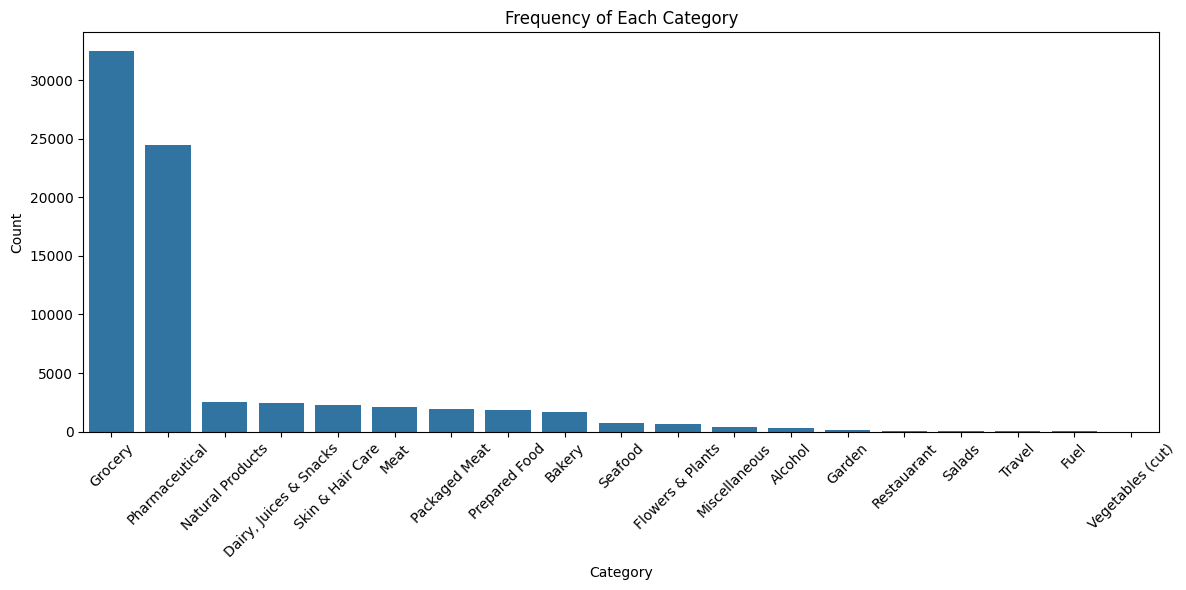

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of 'category'
plt.figure(figsize=(12, 6))
sns.countplot(data=itemdata_df, x='category', order=itemdata_df['category'].value_counts().index)

# Aesthetics
plt.xticks(rotation=45)
plt.title("Frequency of Each Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [49]:
itemdata_df.describe(include='O')

,brand_type,category
count,74066,74066
unique,2,19
top,Established,Grocery
freq,62842,32448


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
itemdata_df['brand_type'] = le.fit_transform(itemdata_df['brand_type'])  # Local=0, Established=1

In [51]:
itemdata_df['category'] = le.fit_transform(itemdata_df['category'])  # if reusing same LabelEncoder

In [52]:
itemdata_df.head()

,item_id,brand,brand_type,category
0,1,1,0,6
1,2,1,0,8
2,3,56,1,1
3,4,56,1,6
4,5,56,1,6


In [53]:
coupon_items = coupon_item_df.merge(item_data, on='item_id', how='left')

In [54]:
coupon_items

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery
...,...,...,...,...,...
92658,32,69268,686,Established,Pharmaceutical
92659,32,68502,1009,Established,Pharmaceutical
92660,32,68612,1104,Established,Pharmaceutical
92661,33,71390,4196,Established,Meat


In [55]:
coupon_features = coupon_items.groupby('coupon_id').agg(
    num_items=('item_id', 'count'),
    num_unique_brands=('brand', 'nunique'),
    brand_type_mode=('brand_type', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
    category_mode=('category', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
).reset_index()


In [56]:
final_df = final_df.merge(coupon_features, on='coupon_id', how='left')


In [57]:
final_df.head(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,...,avg_coupon_discount,total_net_spend,unique_items_bought,active_days,campaign_type,campaign_duration,num_items_y,num_unique_brands,brand_type_mode,category_mode
0,1,13,27,1053,0,4.0,0.0,0.0,1.0,2.0,...,-0.287258,46749.33,208,80,0,47,125,2,Established,Grocery
1,2,13,116,48,0,3.0,0.0,0.0,2.0,2.0,...,-3.215039,78283.13,244,64,0,47,3,1,Local,Grocery
2,6,9,635,205,0,4.0,0.0,0.0,2.0,2.0,...,-2.212082,98054.15,533,83,1,32,67,1,Established,Pharmaceutical
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,...,-0.751477,19165.95,216,64,0,47,4,1,Established,Grocery
4,9,8,1017,1489,0,4.0,0.0,0.0,2.0,2.0,...,-0.471548,55997.58,327,97,0,48,32,1,Established,Grocery
5,11,11,795,793,0,4.0,0.0,0.0,2.0,1.0,...,-0.575506,221072.39,869,116,1,46,13,1,Established,Pharmaceutical
6,14,9,444,590,0,3.0,0.0,0.0,2.0,2.0,...,-0.126223,156612.08,552,168,1,32,14,1,Established,Grocery
7,15,29,538,368,0,3.0,0.0,0.0,1.0,2.0,...,-0.040766,231835.37,1199,214,1,53,9,1,Established,Grocery
8,17,30,857,523,0,NaN,NaN,NaN,NaN,NaN,...,-1.597695,25644.92,127,57,0,46,14,2,Established,Grocery
9,19,2,559,679,0,3.0,1.0,1.0,2.0,2.0,...,0.000000,134430.68,469,52,1,32,31,1,Established,Packaged Meat


In [58]:
from sklearn.preprocessing import LabelEncoder

for col in ['brand_type_mode', 'category_mode']:
    le = LabelEncoder()
    # Fill missing values if any, with a placeholder
    final_df[col] = final_df[col].fillna('Unknown')
    final_df[col] = le.fit_transform(final_df[col])



In [59]:
final_df.isnull().sum()

id                         0
campaign_id                0
coupon_id                  0
customer_id                0
redemption_status          0
age_range              34708
marital_status         34708
rented                 34708
family_size            34708
no_of_children         34708
income_bracket         34708
num_items_x                0
total_quantity             0
total_spent                0
avg_other_discount         0
avg_coupon_discount        0
total_net_spend            0
unique_items_bought        0
active_days                0
campaign_type              0
campaign_duration          0
num_items_y                0
num_unique_brands          0
brand_type_mode            0
category_mode              0
dtype: int64

In [60]:
# List of categorical columns with missing values
categorical_cols = ['age_range', 'marital_status', 'income_bracket']

# List of numerical columns with missing values
numerical_cols = ['rented', 'family_size', 'no_of_children']

# Fill categorical columns with mode
for col in categorical_cols:
    mode_val = final_df[col].mode()[0]  # mode
    final_df[col] = final_df[col].fillna(mode_val)

# Fill numerical columns with median
for col in numerical_cols:
    median_val = final_df[col].median()
    final_df[col] = final_df[col].fillna(median_val)

# Check missing values after imputation
print(final_df[categorical_cols + numerical_cols].isnull().sum())


age_range         0
marital_status    0
income_bracket    0
rented            0
family_size       0
no_of_children    0
dtype: int64


In [61]:
final_df.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
redemption_status      0
age_range              0
marital_status         0
rented                 0
family_size            0
no_of_children         0
income_bracket         0
num_items_x            0
total_quantity         0
total_spent            0
avg_other_discount     0
avg_coupon_discount    0
total_net_spend        0
unique_items_bought    0
active_days            0
campaign_type          0
campaign_duration      0
num_items_y            0
num_unique_brands      0
brand_type_mode        0
category_mode          0
dtype: int64

In [62]:
redemption_counts = final_df['redemption_status'].value_counts()
print(redemption_counts)


redemption_status
0    77640
1      729
Name: count, dtype: int64


- clearly there is class imbalance in our trainingbdataset

In [63]:
final_df.shape

(78369, 25)

## Feature engeneering and decision tree classifier

In [64]:
df = train.merge(campaign_data, on='campaign_id', how='left')
df = df.merge(cus_demo, on='customer_id', how='left')
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,19/05/13,05/07/13,4.0,0.0,0.0,1.0,2.0,5.0
1,2,13,116,48,0,X,19/05/13,05/07/13,3.0,0.0,0.0,2.0,2.0,3.0
2,6,9,635,205,0,Y,11/03/13,12/04/13,4.0,0.0,0.0,2.0,2.0,7.0
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,16/02/13,05/04/13,4.0,0.0,0.0,2.0,2.0,3.0


In [65]:
df['age_range'] = df['age_range'].fillna('Unknown')
df['rented'] = df['rented'].fillna('Unknown')
df['family_size'] = df['family_size'].fillna(df['family_size'].mode()[0])
df['income_bracket'] = df['income_bracket'].fillna('Unknown')
df['marital_status'] = df['marital_status'].fillna('Unknown')


In [66]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [67]:
y = df_encoded['redemption_status'] 
X = df_encoded.drop(['redemption_status', 'customer_id', 'campaign_id', 'coupon_id', 'id'], axis=1, errors='ignore')

In [68]:
X = X.drop(columns=['id'], errors='ignore') 

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=62)

In [70]:
import pandas as pd

cust_trans = pd.read_csv('customer_transaction_data.csv')
coupon_map = pd.read_csv('coupon_item_mapping.csv')
item = pd.read_csv('item_data.csv')

# Aggregate customer purchase history
cust_agg = cust_trans.groupby('customer_id').agg({
    'item_id': 'nunique',  
    'quantity': 'sum',     
    'selling_price': ['sum', 'mean'],  
    'other_discount': 'mean',
    'coupon_discount': 'mean'
})
cust_agg.columns = ['cust_unique_items', 'cust_total_qty', 'cust_total_spend', 'cust_avg_spend', 'cust_avg_other_disc', 'cust_avg_coupon_disc']
cust_agg = cust_agg.reset_index()

feature_cols = ['cust_unique_items', 'cust_total_qty', 'cust_total_spend', 'cust_avg_spend', 'cust_avg_coupon_disc', 'cust_avg_other_disc']
for col in feature_cols:
    if col in df.columns:
        df = df.drop(columns=[col])

# Assume df is your main DataFrame (train merged with campaign and customer info)
df = df.merge(cust_agg, on='customer_id', how='left')

# Precompute customer purchase sets
cust_item_dict = cust_trans.groupby('customer_id')['item_id'].apply(set).to_dict()
# Precompute coupon item sets
coupon_item_dict = coupon_map.groupby('coupon_id')['item_id'].apply(set).to_dict()

def fast_coupon_overlap(row):
    cust_items = cust_item_dict.get(row['customer_id'], set())
    coupon_items = coupon_item_dict.get(row['coupon_id'], set())
    return len(cust_items & coupon_items)

df['coupon_item_overlap'] = df[['customer_id', 'coupon_id']].apply(fast_coupon_overlap, axis=1)

# Fill any new missing values
for col in ['cust_unique_items', 'cust_total_qty', 'cust_total_spend', 'cust_avg_spend', 'cust_avg_other_disc', 'cust_avg_coupon_disc', 'coupon_item_overlap']:
    df[col] = df[col].fillna(0)

In [71]:
import pandas as pd

test = pd.read_csv("test.csv")

In [72]:
for col in feature_cols:
    if col in test.columns:
        test = test.drop(columns=[col])
test = test.merge(cust_agg, on='customer_id', how='left')

test['coupon_item_overlap'] = test[['customer_id', 'coupon_id']].apply(fast_coupon_overlap, axis=1)

for col in feature_cols + ['coupon_item_overlap']:
    test[col] = test[col].fillna(0)

# Encode categorical columns in test set
categorical_cols_test = test.select_dtypes(include=['object']).columns.tolist()
test_encoded = pd.get_dummies(test, columns=categorical_cols_test, drop_first=True)

# Align test set columns with training features
missing_cols = set(X.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0
extra_cols = set(test_encoded.columns) - set(X.columns)
test_encoded = test_encoded.drop(columns=extra_cols)
test_encoded = test_encoded[X.columns]

In [73]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score

# 1. Encode categorical columns in training data
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 2. Prepare features and target
X = df_encoded.drop(['redemption_status', 'customer_id', 'campaign_id', 'coupon_id', 'id'], axis=1, errors='ignore')
y = df_encoded['redemption_status']

# 3. Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt, X_train, y_train, cv=skf, scoring='roc_auc')
print("Mean ROC AUC (CV):", cv_scores.mean())

# 5. Fit on full training data
dt.fit(X_train, y_train)

# 6. Process test data
# Drop old feature columns if present
for col in feature_cols:
    if col in test.columns:
        test = test.drop(columns=[col])

# Merge with aggregates and compute overlap
test = test.merge(cust_agg, on='customer_id', how='left')
test['coupon_item_overlap'] = test[['customer_id', 'coupon_id']].apply(fast_coupon_overlap, axis=1)

# Fill missing values
for col in feature_cols + ['coupon_item_overlap']:
    test[col] = test[col].fillna(0)

# One-hot encode test categorical variables
categorical_cols_test = test.select_dtypes(include=['object']).columns.tolist()
test_encoded = pd.get_dummies(test, columns=categorical_cols_test, drop_first=True)

# Align columns with training features
missing_cols = set(X.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0
extra_cols = set(test_encoded.columns) - set(X.columns)
test_encoded = test_encoded.drop(columns=extra_cols)
test_encoded = test_encoded[X.columns]

# 7. Predict and save
submission = pd.DataFrame({
    'id': test['id'],
    'redemption_status': dt.predict_proba(test_encoded)[:, 1]
})
submission.to_csv('submissionFinal.csv', index=False)
print('✅ Submission file created: submissionFinal.csv')

Mean ROC AUC (CV): 0.9324541866132398
✅ Submission file created: submissionFinal.csv


## XG BOOST

In [75]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    max_depth=6,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_val_pred = xgb_model.predict_proba(X_val)[:, 1]
print("Validation ROC AUC (XGBoost):", roc_auc_score(y_val, y_val_pred))

Validation ROC AUC (XGBoost): 0.985932614878646


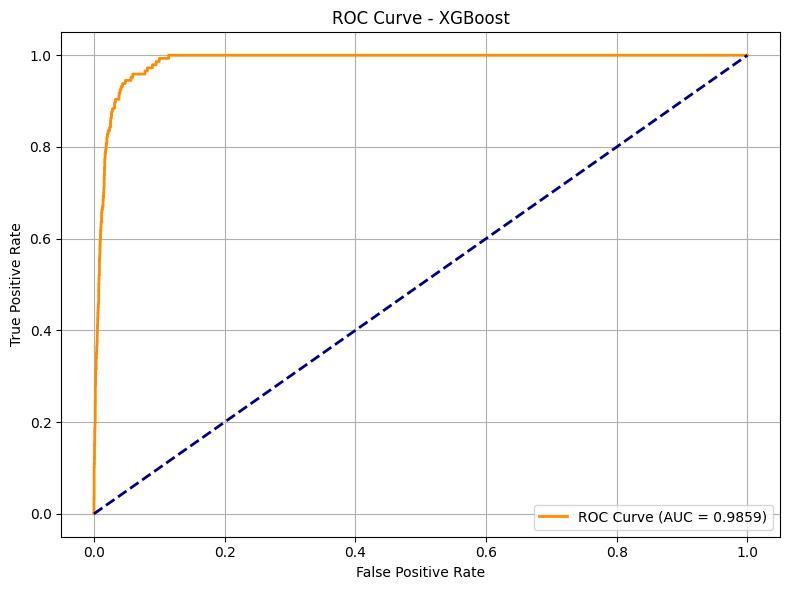

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR, TPR for ROC
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


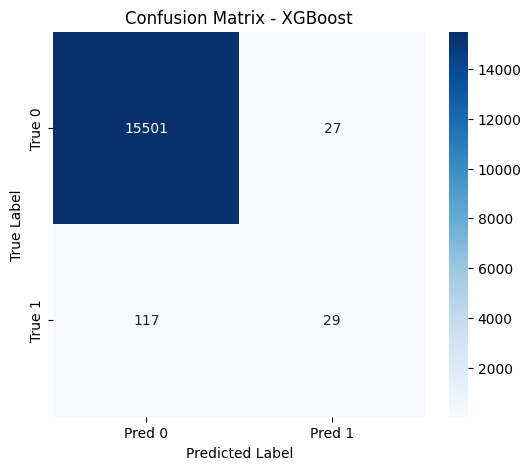

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary labels (threshold = 0.5)
y_val_pred_binary = (y_val_pred >= 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_val_pred_binary)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()



In [78]:
# Ensure test_encoded has same features as X
missing_cols = set(X.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0
extra_cols = set(test_encoded.columns) - set(X.columns)
test_encoded = test_encoded.drop(columns=extra_cols)
test_encoded = test_encoded[X.columns]

# Predict and create submission
submission = pd.DataFrame({
    'id': test['id'],
    'redemption_status': xgb_model.predict_proba(test_encoded)[:, 1]
})
submission.to_csv('submission_xgb.csv', index=False)
print("✅ Submission file saved: submission_xgb.csv")

✅ Submission file saved: submission_xgb.csv


- The best model which i got an roc score of 0.906. xg boost algorithm.

## Model training

In [79]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = final_df.drop(columns=['redemption_status', 'id','coupon_id','customer_id','campaign_id'])  # drop non-feature columns as needed
y = final_df['redemption_status']

# Split train-test (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: redemption_status
0    58229
1      547
Name: count, dtype: int64
After SMOTE: redemption_status
0    58229
1    58229
Name: count, dtype: int64


In [80]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Features and target (make sure to drop id, campaign_id, coupon_id)
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'redemption_status','customer_id']
X = final_df.drop(columns=cols_to_drop)
y = final_df['redemption_status']

# Train-test split (for evaluation, stratify for balanced classes)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Apply SMOTE only on training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # After SMOTE, classes are balanced, so set to 1
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train model
model.fit(X_train_res, y_train_res,
          early_stopping_rounds=50,
          eval_set=[(X_val, y_val)],
          verbose=True)

# Predict on validation set (probabilities)
y_val_pred_prob = model.predict_proba(X_val)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"Validation ROC AUC: {roc_auc:.4f}")


[0]	validation_0-logloss:0.66093
[1]	validation_0-logloss:0.63509
[2]	validation_0-logloss:0.61215
[3]	validation_0-logloss:0.58625
[4]	validation_0-logloss:0.56273
[5]	validation_0-logloss:0.54108
[6]	validation_0-logloss:0.52158
[7]	validation_0-logloss:0.50452
[8]	validation_0-logloss:0.48766
[9]	validation_0-logloss:0.47201
[10]	validation_0-logloss:0.45722
[11]	validation_0-logloss:0.44433
[12]	validation_0-logloss:0.43167
[13]	validation_0-logloss:0.41980
[14]	validation_0-logloss:0.40864
[15]	validation_0-logloss:0.39866
[16]	validation_0-logloss:0.39019
[17]	validation_0-logloss:0.38290
[18]	validation_0-logloss:0.37481
[19]	validation_0-logloss:0.36650
[20]	validation_0-logloss:0.35885
[21]	validation_0-logloss:0.35166
[22]	validation_0-logloss:0.34575
[23]	validation_0-logloss:0.33933
[24]	validation_0-logloss:0.33341
[25]	validation_0-logloss:0.32754
[26]	validation_0-logloss:0.32245
[27]	validation_0-logloss:0.31727
[28]	validation_0-logloss:0.31235
[29]	validation_0-loglos

C:\Users\venig\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.27643
[39]	validation_0-logloss:0.27424
[40]	validation_0-logloss:0.27186
[41]	validation_0-logloss:0.26948
[42]	validation_0-logloss:0.26706
[43]	validation_0-logloss:0.26403
[44]	validation_0-logloss:0.26179
[45]	validation_0-logloss:0.25910
[46]	validation_0-logloss:0.25713
[47]	validation_0-logloss:0.25526
[48]	validation_0-logloss:0.25332
[49]	validation_0-logloss:0.25063
[50]	validation_0-logloss:0.24884
[51]	validation_0-logloss:0.24712
[52]	validation_0-logloss:0.24542
[53]	validation_0-logloss:0.24291
[54]	validation_0-logloss:0.24129
[55]	validation_0-logloss:0.23994
[56]	validation_0-logloss:0.23841
[57]	validation_0-logloss:0.23676
[58]	validation_0-logloss:0.23552
[59]	validation_0-logloss:0.23373
[60]	validation_0-logloss:0.23212
[61]	validation_0-logloss:0.22985
[62]	validation_0-logloss:0.22855
[63]	validation_0-logloss:0.22643
[64]	validation_0-logloss:0.22502
[65]	validation_0-logloss:0.22339
[66]	validation_0-logloss:0.22199
[67]	validatio

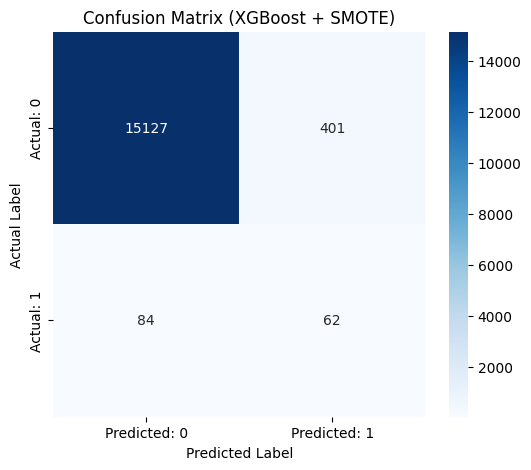

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predicted probabilities to binary predictions using threshold = 0.5
y_val_pred_binary = (y_val_pred_prob >= 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_val_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (XGBoost + SMOTE)")
plt.show()


In [82]:
test_df=pd.read_csv("test.csv")

In [83]:
test_df.shape

(50226, 4)

In [84]:
test_df.head()



,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [85]:
test_df = pd.merge(test_df, cus_demo, on='customer_id', how='left')


In [86]:
test_df.shape

(50226, 10)

In [87]:
# Merge coupon features into test_df on coupon_id
test_df = pd.merge(test_df, coupon_item, on='coupon_id', how='left')


In [88]:
test_df.head()


,id,campaign_id,coupon_id,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,num_items,unique_items
0,3,22,869,967,3.0,0.0,0.0,1.0,2.0,5.0,72,72
1,4,20,389,1566,2.0,0.0,0.0,2.0,2.0,9.0,33,33
2,5,22,981,510,2.0,0.0,0.0,2.0,1.0,1.0,19,19
3,8,25,1069,361,1.0,1.0,0.0,1.0,2.0,3.0,74,74
4,10,17,498,811,NaN,NaN,NaN,NaN,NaN,NaN,18,18


In [89]:
test_df.drop(columns=['unique_items'],inplace=True)

In [90]:
test_df.head()

,id,campaign_id,coupon_id,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,num_items
0,3,22,869,967,3.0,0.0,0.0,1.0,2.0,5.0,72
1,4,20,389,1566,2.0,0.0,0.0,2.0,2.0,9.0,33
2,5,22,981,510,2.0,0.0,0.0,2.0,1.0,1.0,19
3,8,25,1069,361,1.0,1.0,0.0,1.0,2.0,3.0,74
4,10,17,498,811,NaN,NaN,NaN,NaN,NaN,NaN,18


In [91]:
test_df = pd.merge(test_df, campaign_df[['campaign_id', 'campaign_type', 'campaign_duration']], on='campaign_id', how='left')


In [92]:
test_df = pd.merge(test_df, agg_trans, on='customer_id', how='left')


In [93]:
# For categorical columns fill with mode from training or 'Unknown'
for col in ['age_range', 'marital_status', 'income_bracket']:
    mode_val = final_df[col].mode()[0]  # or hardcode from train
    test_df[col] = test_df[col].fillna(mode_val)

# For numerical columns fill with median from training
for col in ['rented', 'family_size', 'no_of_children']:
    median_val = final_df[col].median()
    test_df[col] = test_df[col].fillna(median_val)

# For transaction features fill NaN with 0
transaction_features = ['total_quantity', 'total_spent', 'avg_other_discount', 'avg_coupon_discount', 'unique_items_bought', 'active_days']
test_df[transaction_features] = test_df[transaction_features].fillna(0)


In [94]:
from sklearn.preprocessing import LabelEncoder

for col in ['brand_type_mode', 'category_mode']:
    le = LabelEncoder()
    # Fill missing values if any, with a placeholder
    test_df[col] = final_df[col].fillna('Unknown')
    test_df[col] = le.fit_transform(test_df[col])

In [95]:
test_df.shape

(50226, 22)

In [96]:
final_df.shape

(78369, 25)

In [97]:
test_df.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'age_range',
       'marital_status', 'rented', 'family_size', 'no_of_children',
       'income_bracket', 'num_items', 'campaign_type', 'campaign_duration',
       'total_quantity', 'total_spent', 'avg_other_discount',
       'avg_coupon_discount', 'total_net_spend', 'unique_items_bought',
       'active_days', 'brand_type_mode', 'category_mode'],
      dtype='object')

In [98]:
final_df.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket', 'num_items_x', 'total_quantity',
       'total_spent', 'avg_other_discount', 'avg_coupon_discount',
       'total_net_spend', 'unique_items_bought', 'active_days',
       'campaign_type', 'campaign_duration', 'num_items_y',
       'num_unique_brands', 'brand_type_mode', 'category_mode'],
      dtype='object')

In [99]:
train_cols = set(final_df.columns)
test_cols = set(test_df.columns)

missing_cols = train_cols - test_cols
print("Missing columns in test data:", missing_cols)


Missing columns in test data: {'redemption_status', 'num_items_x', 'num_items_y', 'num_unique_brands'}


In [100]:
# Suppose coupon features aggregation during training:
coupon_features = coupon_item_mapping.groupby('coupon_id').agg(
    num_items_x=('item_id', 'count'),
    num_items_y=('item_id', 'nunique')
).reset_index()

# Merge to test
test_df = pd.merge(test_df, coupon_features, on='coupon_id', how='left')


In [101]:
brand_counts = test_df.groupby('customer_id').agg(
    num_unique_brands=('brand_type_mode', 'nunique')
).reset_index()

test_df = pd.merge(test_df, brand_counts, on='customer_id', how='left')


In [102]:
# Columns used for training (excluding target)
feature_cols = [col for col in final_df.columns if col != 'redemption_status']

# Reorder test_df columns to match training features exactly
test_df = test_df.reindex(columns=feature_cols)

# Check if any columns are missing in test_df after reindexing
missing_cols = set(feature_cols) - set(test_df.columns)
if missing_cols:
    print(f"Warning: These columns are missing in test data: {missing_cols}")
    # Create these missing columns filled with 0 or appropriate default
    for col in missing_cols:
        test_df[col] = 0

# Reorder again to include newly added columns in correct order
test_df = test_df.reindex(columns=feature_cols)


In [103]:

# Columns to drop before training
cols_to_drop = ['redemption_status', 'id', 'campaign_id', 'coupon_id', 'customer_id']

X_train = final_df.drop(columns=cols_to_drop, errors='ignore')
y_train = final_df['redemption_status']


In [104]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Drop unwanted columns
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status']
X = final_df.drop(columns=cols_to_drop, errors='ignore')
y = final_df['redemption_status']

# Apply SMOTE on full data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Initialize XGBoost model
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train on full resampled data
model.fit(X_res, y_res)

# Optional: If you want to evaluate on the same training data (not recommended), do:
train_pred = model.predict_proba(X_res)[:,1]
print("Training ROC AUC:", roc_auc_score(y_res, train_pred))


Training ROC AUC: 0.9985155125865266


In [105]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Prepare features and target
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status']
X = final_df.drop(columns=cols_to_drop, errors='ignore')
y = final_df['redemption_status']

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train XGBoost model (binary classifier)
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_res, y_res)

# Make hard predictions (0 or 1)
train_preds_hard = model.predict(X_res)

# Calculate ROC AUC using hard predictions
roc_score = roc_auc_score(y_res, train_preds_hard)
print("Training ROC AUC (hard predictions only):", roc_score)


Training ROC AUC (hard predictions only): 0.9861926841834107


In [106]:
from sklearn.preprocessing import LabelEncoder

# Columns to drop (IDs)
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'customer_id']
test_df_clean = test_df.drop(columns=cols_to_drop, errors='ignore')

# Impute categorical columns with training mode
for col in ['age_range', 'marital_status', 'income_bracket']:
    mode_val = final_df[col].mode()[0]
    test_df_clean[col] = test_df_clean[col].fillna(mode_val)

# Impute numerical columns with training median
for col in ['rented', 'family_size', 'no_of_children']:
    median_val = final_df[col].median()
    test_df_clean[col] = test_df_clean[col].fillna(median_val)

# Impute transaction features with 0
transaction_features = ['total_quantity', 'total_spent', 'avg_other_discount', 'avg_coupon_discount',
                        'total_net_spend', 'unique_items_bought', 'active_days']
test_df_clean[transaction_features] = test_df_clean[transaction_features].fillna(0)

# Encode categorical features (example label encoding)
for col in ['brand_type_mode', 'category_mode']:
    test_df_clean[col] = test_df_clean[col].fillna('Unknown')
    le = LabelEncoder()
    le.fit(final_df[col].astype(str))  # fit on train
    test_df_clean[col] = le.transform(test_df_clean[col].astype(str))

# Reorder test columns to match training features (except target)
train_features = [c for c in final_df.columns if c != 'redemption_status']
test_df_clean = test_df_clean.reindex(columns=train_features)


In [107]:
train_features = [col for col in final_df.columns if col != 'redemption_status']
test_features = list(test_df.columns)

print("Training features count:", len(train_features))
print("Test features count:", len(test_features))
print("Features in train not in test:", set(train_features) - set(test_features))
print("Features in test not in train:", set(test_features) - set(train_features))
print("Are columns exactly same (including order)?", train_features == test_features)


Training features count: 24
Test features count: 24
Features in train not in test: set()
Features in test not in train: set()
Are columns exactly same (including order)? True


In [108]:
# Add missing columns to test with default 0
missing_in_test = set(train_features) - set(test_features)
for col in missing_in_test:
    test_df[col] = 0

# Drop extra columns from test
extra_in_test = set(test_features) - set(train_features)
test_df.drop(columns=list(extra_in_test), inplace=True)

# Reorder test columns to match training exactly
test_df = test_df[train_features]


In [109]:
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'customer_id']

# Drop ID columns from test data before prediction
X_test = test_df.drop(columns=cols_to_drop, errors='ignore')


In [110]:
missing_in_test = set(train_features) - set(test_df.columns)
extra_in_test = set(test_df.columns) - set(train_features)

print(f"Missing in test: {missing_in_test}")
print(f"Extra in test: {extra_in_test}")


Missing in test: set()
Extra in test: set()


In [111]:
test_df.shape




(50226, 24)

In [112]:
# Save id column before dropping
test_ids = test_df['id'].copy()

# Drop id and other ID cols for prediction
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'customer_id']
test_df_clean = test_df.drop(columns=cols_to_drop, errors='ignore')

# (do your preprocessing and prediction here)
preds = model.predict(test_df_clean)

# Create submission using saved ids
submission = pd.DataFrame({
    'id': test_ids,
    'redemption_status': preds
})

submission.to_csv('submission_manoj.csv', index=False)
print("✅ submission.csv saved successfully!")



✅ submission.csv saved successfully!


In [113]:
print(test_df_clean.columns)


Index(['age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket', 'num_items_x', 'total_quantity',
       'total_spent', 'avg_other_discount', 'avg_coupon_discount',
       'total_net_spend', 'unique_items_bought', 'active_days',
       'campaign_type', 'campaign_duration', 'num_items_y',
       'num_unique_brands', 'brand_type_mode', 'category_mode'],
      dtype='object')


In [114]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

# Drop unwanted columns and separate features/target
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status']
X = final_df.drop(columns=cols_to_drop, errors='ignore')
y = final_df['redemption_status']

# Split before SMOTE (apply SMOTE only on training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize CatBoost
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=42
)

# Train on resampled data
model.fit(X_train_res, y_train_res)

# Predict probabilities for ROC AUC
test_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC on test set
roc_score = roc_auc_score(y_test, test_probs)
print("Test ROC AUC Score:", roc_score)


Test ROC AUC Score: 0.9169216192754759


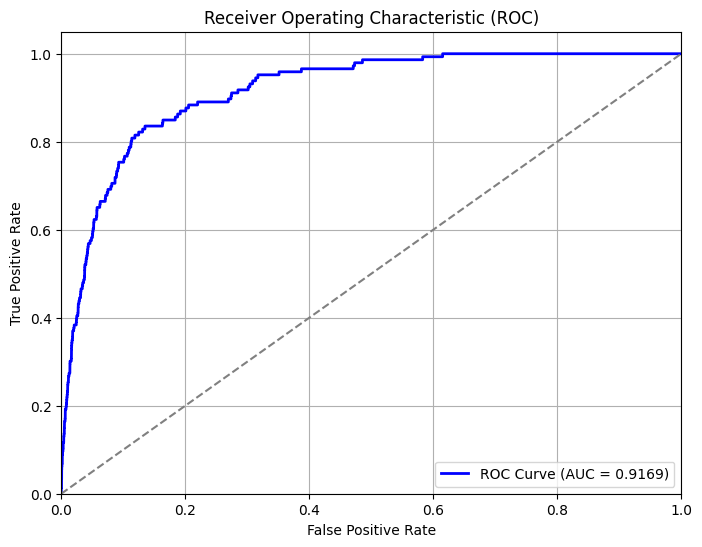

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [116]:
from catboost import CatBoostClassifier
import pandas as pd

# Step 1: Save ID column for submission
test_ids = test_df['id'].copy()

# Step 2: Drop ID columns
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'customer_id']
X_test = test_df.drop(columns=cols_to_drop, errors='ignore')

# Step 3: Ensure consistent preprocessing
# Fill missing values using training median
X_test = X_test.fillna(X_res.median(numeric_only=True))

# Step 4: Predict hard labels
preds = model.predict(X_test)

# Step 5: Create submission DataFrame
submission = pd.DataFrame({
    'id': test_ids,
    'redemption_status': preds
})

# Step 6: Save to CSV
submission.to_csv('submission_catboost.csv', index=False)
print("✅ 'submission_cat.csv' saved successfully!")


✅ 'submission_cat.csv' saved successfully!


## Linear Regression

Validation ROC AUC (Linear Regression): 0.8479


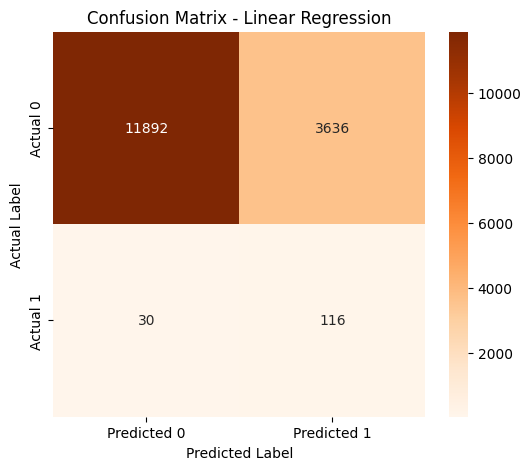

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     15528
           1       0.03      0.79      0.06       146

    accuracy                           0.77     15674
   macro avg       0.51      0.78      0.46     15674
weighted avg       0.99      0.77      0.86     15674



In [117]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Prepare features and target
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'redemption_status', 'customer_id']
X = final_df.drop(columns=cols_to_drop)
y = final_df['redemption_status']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_res, y_train_res)

# Predict continuous probabilities (raw scores)
y_val_pred_prob = model.predict(X_val)

# Ensure predictions are clipped between 0 and 1
y_val_pred_prob = y_val_pred_prob.clip(0, 1)

# ROC AUC
roc_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"Validation ROC AUC (Linear Regression): {roc_auc:.4f}")

# Convert to binary predictions using threshold = 0.5
y_val_pred_binary = (y_val_pred_prob >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Linear Regression")
plt.show()

# Classification Report
print(classification_report(y_val, y_val_pred_binary))



In [118]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df):
    df_const = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df_const.values, i+1) for i in range(df.shape[1])]
    return vif_data

# Example usage:
vif_df = calculate_vif(X_train)  # replace X_train with your DataFrame
print(vif_df.sort_values(by='VIF', ascending=False))


C:\Users\venig\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                feature         VIF
16          num_items_y         inf
6           num_items_x         inf
8           total_spent  241.931790
11      total_net_spend  206.039621
12  unique_items_bought    6.354940
9    avg_other_discount    2.158498
17    num_unique_brands    2.063419
7        total_quantity    1.994493
13          active_days    1.873703
14        campaign_type    1.394080
10  avg_coupon_discount    1.365655
15    campaign_duration    1.315232
3           family_size    1.272905
0             age_range    1.229449
1        marital_status    1.221114
5        income_bracket    1.169429
2                rented    1.110434
18      brand_type_mode    1.107956
4        no_of_children    1.093100
19        category_mode    1.059321


In [119]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Step 1: Save ID column
test_ids = test_df['id'].copy()

# Step 2: Drop ID columns
cols_to_drop = ['id', 'campaign_id', 'coupon_id', 'customer_id']
X_test = test_df.drop(columns=cols_to_drop, errors='ignore')

# Step 4: Predict probabilities (continuous values)
preds = model.predict(X_test)

# Step 5: Clip predictions between 0 and 1
preds = preds.clip(0, 1)

# Step 6: Create submission DataFrame
submission = pd.DataFrame({
    'id': test_ids,
    'redemption_status': preds  # float probabilities
})

# Step 7: Save to CSV
submission.to_csv('submission_linear_regression.csv', index=False)
print("✅ 'submission_linear_regression.csv' saved successfully!")


✅ 'submission_linear_regression.csv' saved successfully!


## Hyper parameter tuning



To ensure optimal performance, Optuna is used to fine-tune key hyperparameters through cross-validated AUC maximization. The final model is trained using the best-found parameters on the entire training set and outputs redemption probabilities for each test case, saved in a submission-ready CSV format. With an roc score of 87.5 when tested

In [2]:
!pip install --upgrade category_encoders
!pip install catboost
!pip install optuna

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier, Pool
import optuna
from category_encoders import TargetEncoder

base_dir = './'
paths = {
    'train': os.path.join(base_dir, 'train.csv'),
    'test': os.path.join(base_dir, 'test.csv'),
    'campaign': os.path.join(base_dir, 'campaign_data.csv'),
    'coupon_item': os.path.join(base_dir, 'coupon_item_mapping.csv'),
    'item': os.path.join(base_dir, 'item_data.csv'),
    'customer_demo': os.path.join(base_dir, 'customer_demographics.csv'),
    'transaction': os.path.join(base_dir, 'customer_transaction_data.csv')
}

train = pd.read_csv(paths['train'])
test = pd.read_csv(paths['test'])
campaign = pd.read_csv(paths['campaign'])
coupon_item = pd.read_csv(paths['coupon_item'])
item = pd.read_csv(paths['item'])
customer_demo = pd.read_csv(paths['customer_demo'])
transactions = pd.read_csv(paths['transaction'])

def enrich_base(df):
    df = df.merge(campaign, on='campaign_id', how='left')
    df = df.merge(customer_demo, on='customer_id', how='left')

    ci_full = coupon_item.merge(item, on='item_id', how='left')
    agg = ci_full.groupby('coupon_id').agg({
        'item_id': 'count',
        'brand': lambda x: list(set(x)),
        'category': lambda x: list(set(x))
    }).rename(columns={'item_id': 'n_coupon_items'}).reset_index()

    df = df.merge(agg, on='coupon_id', how='left')
    return df

train = enrich_base(train)
test = enrich_base(test)

trans_items = transactions.groupby('customer_id')['item_id'].apply(set).to_dict()
item_brand = item.set_index('item_id')['brand'].to_dict()
item_cat = item.set_index('item_id')['category'].to_dict()

def item_match(row, key):
    cust_items = trans_items.get(row['customer_id'], set())
    if isinstance(row[key], list):
        return int(len(set(row[key]).intersection({item_brand.get(i, None) for i in cust_items})) > 0)
    return 0

train['has_bought_coupon_brand'] = train.apply(lambda r: item_match(r, 'brand'), axis=1)
test['has_bought_coupon_brand'] = test.apply(lambda r: item_match(r, 'brand'), axis=1)

train['has_bought_coupon_category'] = train.apply(lambda r: item_match(r, 'category'), axis=1)
test['has_bought_coupon_category'] = test.apply(lambda r: item_match(r, 'category'), axis=1)

transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')
agg_trans = transactions.groupby('customer_id').agg(
    total_quantity=('quantity', 'sum'),
    total_spent=('selling_price', 'sum'),
    avg_other_discount=('other_discount', 'mean'),
    avg_coupon_discount=('coupon_discount', 'mean'),
    transaction_count=('date', 'count'),
    last_purchase_date=('date', 'max'),
    first_purchase_date=('date', 'min')
).reset_index()

train = train.merge(agg_trans, on='customer_id', how='left')
test = test.merge(agg_trans, on='customer_id', how='left')

fill_cols = ['total_quantity', 'total_spent', 'avg_other_discount', 'avg_coupon_discount', 'transaction_count']
for col in fill_cols:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

def add_time_features(df):
    ref_date = pd.Timestamp('2025-01-01')
    df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'], errors='coerce')
    df['days_since_last_purchase'] = (ref_date - df['last_purchase_date']).dt.days.fillna(-1)

    df['first_purchase_date'] = pd.to_datetime(df['first_purchase_date'], errors='coerce')
    df['days_since_first_purchase'] = (ref_date - df['first_purchase_date']).dt.days.fillna(-1)

    df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
    df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
    df['campaign_duration'] = (df['end_date'] - df['start_date']).dt.days.fillna(0).clip(lower=0)
    return df

train = add_time_features(train)
test = add_time_features(test)

tx_freq = transactions.groupby('customer_id').size().reset_index(name='transaction_freq')
train = train.merge(tx_freq, on='customer_id', how='left').fillna({'transaction_freq': 0})
test = test.merge(tx_freq, on='customer_id', how='left').fillna({'transaction_freq': 0})

for col in ['family_size', 'no_of_children']:
    train[col] = pd.to_numeric(train[col], errors='coerce')
    test[col] = pd.to_numeric(test[col], errors='coerce')
    med = train.groupby('age_range')[col].transform('median')
    train[col] = train[col].fillna(med).fillna(train[col].median())
    test[col] = test[col].fillna(med).fillna(train[col].median())

for col in ['age_range', 'marital_status', 'rented', 'campaign_type']:
    mode = train[col].mode()[0]
    train[col] = train[col].fillna(mode)
    test[col] = test[col].fillna(mode)

cat_cols = ['age_range', 'marital_status', 'rented', 'campaign_type']
te = TargetEncoder(cols=cat_cols, smoothing=0.3)
train[cat_cols] = te.fit_transform(train[cat_cols], train['redemption_status'])
test[cat_cols] = te.transform(test[cat_cols])

drop_cols = ['redemption_status', 'id', 'coupon_id', 'customer_id', 'campaign_id', 'brand', 'category', 'start_date', 'end_date', 'last_purchase_date', 'first_purchase_date']
X_train = train.drop(columns=drop_cols)
y_train = train['redemption_status']
X_test = test.drop(columns=['id', 'coupon_id', 'customer_id', 'campaign_id', 'brand', 'category', 'start_date', 'end_date', 'last_purchase_date', 'first_purchase_date'])

def objective(trial):
    params = {
        'iterations': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 1, 20),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'task_type': 'CPU',
        'eval_metric': 'AUC',
        'early_stopping_rounds': 50,
        'random_seed': 42,
        'verbose': False
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model = CatBoostClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=(X_val, y_val), verbose=False)
        preds = model.predict_proba(X_val)[:, 1]
        aucs.append(roc_auc_score(y_val, preds))
    return np.mean(aucs)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

best_params = study.best_params
best_params.update({
    'iterations': 1000,
    'task_type': 'CPU',
    'eval_metric': 'AUC',
    'random_seed': 42,
    'early_stopping_rounds': 50,
    'verbose': 100
})

final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train)

test_preds = final_model.predict_proba(X_test)[:, 1]
submission = pd.DataFrame({'id': test['id'], 'redemption_status': test_preds})
submission.to_csv('submission.csv', index=False)
print("Saved as 'submission.csv'")

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\venig\AppData\Local\Temp\ipykernel_29076\2491661713.py:93: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
C:\Users\venig\AppData\Local\Temp\ipykernel_29076\2491661713.py:94: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
C:\Users\venig\AppData\Local\Temp\ipykernel_29076\2491661713.py:93: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, plea

0:	total: 50.9ms	remaining: 50.8s
100:	total: 4.49s	remaining: 40s
200:	total: 8.89s	remaining: 35.3s
300:	total: 13.3s	remaining: 31s
400:	total: 17.9s	remaining: 26.8s
500:	total: 22.5s	remaining: 22.4s
600:	total: 27.2s	remaining: 18s
700:	total: 32.1s	remaining: 13.7s
800:	total: 37s	remaining: 9.19s
900:	total: 42s	remaining: 4.61s
999:	total: 46.9s	remaining: 0us
Saved as 'submission.csv'


In [120]:

# Load all uploaded CSV files
train = pd.read_csv("train.csv")
campaign_data = pd.read_csv("campaign_data.csv")
coupon_item_mapping = pd.read_csv("coupon_item_mapping.csv")
customer_demographics = pd.read_csv("customer_demographics.csv")
customer_transactions = pd.read_csv("customer_transaction_data.csv")
item_data = pd.read_csv("item_data.csv")

# Step 2A: Clean family_size
customer_demographics['family_size'] = customer_demographics['family_size'].astype(str).str.replace('+', '', regex=False)
customer_demographics['family_size'] = pd.to_numeric(customer_demographics['family_size'], errors='coerce')

customer_demographics['no_of_children'] = customer_demographics['no_of_children'].astype(str).str.replace('+', '', regex=False)
customer_demographics['no_of_children'] = pd.to_numeric(customer_demographics['no_of_children'], errors='coerce')

mask_marital = customer_demographics['marital_status'].isnull() & customer_demographics['family_size'].notnull()
customer_demographics.loc[mask_marital & (customer_demographics['family_size'] > 1), 'marital_status'] = 'Married'
customer_demographics.loc[mask_marital & (customer_demographics['family_size'] <= 1), 'marital_status'] = 'Single'

mask_children = customer_demographics['no_of_children'].isnull() & customer_demographics['family_size'].notnull()
customer_demographics.loc[mask_children & (customer_demographics['family_size'] > 2), 'no_of_children'] = \
    customer_demographics.loc[mask_children & (customer_demographics['family_size'] > 2), 'family_size'] - 2
customer_demographics.loc[mask_children & (customer_demographics['family_size'] <= 2), 'no_of_children'] = 0

# Check initial shapes and head of each to understand structure
summary = {
    "train.csv": train.shape,
    "campaign_data.csv": campaign_data.shape,
    "coupon_item_mapping.csv": coupon_item_mapping.shape,
    "customer_demographics.csv": customer_demographics.shape,
    "customer_transaction_data.csv": customer_transactions.shape,
    "item_data.csv": item_data.shape
}

summary_df = pd.DataFrame(list(summary.items()), columns=["File", "Shape"])
summary_df


,File,Shape
0,train.csv,"(78369, 5)"
1,campaign_data.csv,"(28, 4)"
2,coupon_item_mapping.csv,"(92663, 2)"
3,customer_demographics.csv,"(760, 7)"
4,customer_transaction_data.csv,"(1324566, 7)"
5,item_data.csv,"(74066, 4)"


In [121]:
# Step 2: Merge train with campaign_data and customer_demographics, and create campaign_duration

# Merge with campaign data
train_merged = train.merge(campaign_data, on='campaign_id', how='left')

# Convert dates to datetime
train_merged['start_date'] = pd.to_datetime(train_merged['start_date'], format='%d/%m/%y')
train_merged['end_date'] = pd.to_datetime(train_merged['end_date'], format='%d/%m/%y')


# Add campaign_duration feature
train_merged['campaign_duration'] = (train_merged['end_date'] - train_merged['start_date']).dt.days

# Merge with customer demographics
train_merged = train_merged.merge(customer_demographics, on='customer_id', how='left')

# Display the first few rows of the merged dataset
train_merged.head()


,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_duration,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47,46-55,Single,0.0,1.0,0.0,5.0
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47,36-45,Married,0.0,2.0,0.0,3.0
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32,46-55,Married,0.0,2.0,0.0,7.0
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48,46-55,Married,0.0,2.0,0.0,3.0


In [122]:
# Step 3: Coupon-level feature engineering

# Merge coupon-item mapping with item data
coupon_items = coupon_item_mapping.merge(item_data, on='item_id', how='left')

# Aggregate coupon features
coupon_features = coupon_items.groupby('coupon_id').agg(
    num_items=('item_id', 'count'),
    num_unique_categories=('category', 'nunique'),
    num_unique_brands=('brand', 'nunique'),
    brand_type_mode=('brand_type', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
    category_mode=('category', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'),
    established_ratio=('brand_type', lambda x: (x == 'Established').sum() / len(x))
).reset_index()

# Merge coupon features into train_merged
train_merged = train_merged.merge(coupon_features, on='coupon_id', how='left')

# Show updated dataset with coupon features
train_merged.head()


,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_duration,age_range,...,rented,family_size,no_of_children,income_bracket,num_items,num_unique_categories,num_unique_brands,brand_type_mode,category_mode,established_ratio
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47,46-55,...,0.0,1.0,0.0,5.0,125,1,2,Established,Grocery,1.0
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47,36-45,...,0.0,2.0,0.0,3.0,3,1,1,Local,Grocery,0.0
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32,46-55,...,0.0,2.0,0.0,7.0,67,1,1,Established,Pharmaceutical,1.0
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47,NaN,...,NaN,NaN,NaN,NaN,4,1,1,Established,Grocery,1.0
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48,46-55,...,0.0,2.0,0.0,3.0,32,1,1,Established,Grocery,1.0


In [123]:
# Step 4: Customer-level feature engineering

# Aggregate customer transaction features
customer_txn_features = customer_transactions.groupby('customer_id').agg(
    total_transactions=('date', 'count'),
    total_quantity=('quantity', 'sum'),
    total_spend=('selling_price', 'sum'),
    avg_coupon_discount=('coupon_discount', 'mean'),
    avg_other_discount=('other_discount', 'mean'),
    total_coupon_discount=('coupon_discount', 'sum'),
    unique_items=('item_id', 'nunique')
).reset_index()

# Merge into the main training dataset
train_merged = train_merged.merge(customer_txn_features, on='customer_id', how='left')

# Show updated dataset
train_merged.head()


,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_duration,age_range,...,brand_type_mode,category_mode,established_ratio,total_transactions,total_quantity,total_spend,avg_coupon_discount,avg_other_discount,total_coupon_discount,unique_items
0,1,13,27,1053,0,X,2013-05-19,2013-07-05,47,46-55,...,Established,Grocery,1.0,310,105551,57120.75,-0.287258,-33.168935,-89.05,208
1,2,13,116,48,0,X,2013-05-19,2013-07-05,47,36-45,...,Local,Grocery,0.0,385,12143,90185.10,-3.215039,-27.699169,-1237.79,244
2,6,9,635,205,0,Y,2013-03-11,2013-04-12,32,46-55,...,Established,Pharmaceutical,1.0,970,1351,117461.66,-2.212082,-17.795660,-2145.72,533
3,7,13,644,1050,0,X,2013-05-19,2013-07-05,47,NaN,...,Established,Grocery,1.0,237,306,23291.42,-0.751477,-16.655570,-178.10,216
4,9,8,1017,1489,0,X,2013-02-16,2013-04-05,48,46-55,...,Established,Grocery,1.0,562,139063,67797.49,-0.471548,-20.524733,-265.01,327


In [124]:
# Find customer IDs missing demographics
missing_demog_customers = set(train['customer_id']) - set(customer_demographics['customer_id'])

# Filter train rows with these customer_ids
train_missing_demog = train[train['customer_id'].isin(missing_demog_customers)]

# Count target classes (replace 'target_column' with your actual target column name)
class_counts = train_missing_demog['redemption_status'].value_counts()

print(class_counts)


redemption_status
0    34547
1      161
Name: count, dtype: int64


In [125]:
train_merged = train_merged.drop(columns=['start_date', 'end_date', 'id', 'campaign_id', 'coupon_id', 'customer_id']) 

In [126]:
cols_to_abs = ['avg_coupon_discount', 'avg_other_discount', 'total_coupon_discount']
train_merged[cols_to_abs] = train_merged[cols_to_abs].abs()

In [127]:
# For categorical columns, impute with mode (most frequent)
categorical_cols = ['age_range', 'marital_status', 'rented', 'income_bracket']

for col in categorical_cols:
    if train_merged[col].isnull().sum() > 0:
        mode_val = train_merged[col].mode()[0]
        train_merged[col].fillna(mode_val, inplace=True)

# Treat as numeric and use median
numeric_cols = ['no_of_children', 'family_size']
for col in numeric_cols:
    if col in train_merged.columns and train_merged[col].isnull().sum() > 0:
        median_val = train_merged[col].median()
        train_merged[col].fillna(median_val, inplace=True)

C:\Users\venig\AppData\Local\Temp\ipykernel_20948\2566362351.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_merged[col].fillna(mode_val, inplace=True)
C:\Users\venig\AppData\Local\Temp\ipykernel_20948\2566362351.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [128]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

for col in train_merged.select_dtypes(include='object').columns:
    train_merged[col] = train_merged[col].astype(str)
    le = LabelEncoder()
    train_merged[col] = le.fit_transform(train_merged[col])

In [129]:
# === ADVANCED FEATURE ENGINEERING SECTION ===
print("Starting advanced feature engineering...")

# Save the current state of train_merged after label encoding
label_encoded_data = train_merged.copy()

# Get the original IDs from the train dataset before they were dropped
# We'll use the index to match them
original_ids = train[['customer_id', 'coupon_id']].copy()

# Create a detailed transaction history with categories and brands
print("Creating customer purchase history...")
customer_item_history = customer_transactions.merge(
    item_data[['item_id', 'category', 'brand', 'brand_type']],
    on='item_id',
    how='left'
)

# Add date features for recency calculations
customer_item_history['date'] = pd.to_datetime(customer_item_history['date'])
max_date = customer_item_history['date'].max()
customer_item_history['days_ago'] = (max_date - customer_item_history['date']).dt.days

# 1. CUSTOMER-CATEGORY AFFINITY SCORE
print("Calculating category affinity scores...")
# Calculate category spending with recency weight
customer_item_history['recency_weight'] = np.exp(-customer_item_history['days_ago'] / 90)
customer_item_history['weighted_spend'] = customer_item_history['selling_price'] * customer_item_history['recency_weight']

# Customer category affinity
customer_category_affinity = customer_item_history.groupby(['customer_id', 'category']).agg({
    'weighted_spend': 'sum',
    'selling_price': 'sum',
    'item_id': 'count'
}).reset_index()
customer_category_affinity.columns = ['customer_id', 'category', 'category_weighted_spend', 'category_total_spend', 'category_purchase_count']

# Get total customer spending
customer_total_spend = customer_category_affinity.groupby('customer_id').agg({
    'category_weighted_spend': 'sum',
    'category_total_spend': 'sum'
}).reset_index()
customer_total_spend.columns = ['customer_id', 'total_weighted_spend', 'total_spend_all']

# Calculate percentages
customer_category_affinity = customer_category_affinity.merge(customer_total_spend, on='customer_id')
customer_category_affinity['category_affinity_score'] = customer_category_affinity['category_weighted_spend'] / customer_category_affinity['total_weighted_spend']
customer_category_affinity['category_spend_percentage'] = customer_category_affinity['category_total_spend'] / customer_category_affinity['total_spend_all']

# Get primary category for each coupon
coupon_primary_category = coupon_items.groupby('coupon_id')['category'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').reset_index()
coupon_primary_category.columns = ['coupon_id', 'coupon_primary_category']

# Create a dictionary for faster lookup
category_affinity_dict = {}
for _, row in customer_category_affinity.iterrows():
    key = (row['customer_id'], row['category'])
    category_affinity_dict[key] = {
        'affinity_score': row['category_affinity_score'],
        'spend_percentage': row['category_spend_percentage']
    }

# Create affinity features by matching with original IDs
print("Creating affinity features...")
affinity_scores = []
spend_percentages = []

for idx in range(len(label_encoded_data)):
    if idx % 10000 == 0:
        print(f"Processing row {idx}/{len(label_encoded_data)}")

    # Get original customer_id and coupon_id using index
    orig_customer_id = original_ids.loc[idx, 'customer_id']
    orig_coupon_id = original_ids.loc[idx, 'coupon_id']

    # Get coupon category
    coupon_cat = coupon_primary_category[coupon_primary_category['coupon_id'] == orig_coupon_id]['coupon_primary_category'].values
    if len(coupon_cat) > 0:
        category = coupon_cat[0]
        key = (orig_customer_id, category)
        if key in category_affinity_dict:
            affinity_scores.append(category_affinity_dict[key]['affinity_score'])
            spend_percentages.append(category_affinity_dict[key]['spend_percentage'])
        else:
            affinity_scores.append(0)
            spend_percentages.append(0)
    else:
        affinity_scores.append(0)
        spend_percentages.append(0)

label_encoded_data['category_affinity_score'] = affinity_scores
label_encoded_data['category_spend_percentage'] = spend_percentages

# 2. PRICE SENSITIVITY MATCH
print("Calculating price sensitivity match...")
# Customer average price points
customer_price_stats = customer_item_history.groupby('customer_id').agg({
    'selling_price': ['mean', 'median', 'std']
}).reset_index()
customer_price_stats.columns = ['customer_id', 'avg_item_price', 'median_item_price', 'price_std']
customer_price_stats['price_std'] = customer_price_stats['price_std'].fillna(0)

# Create price dict for faster lookup
customer_price_dict = customer_price_stats.set_index('customer_id')[['avg_item_price', 'median_item_price']].to_dict('index')

# Get average prices for items in coupons
coupon_item_prices = coupon_item_mapping.merge(
    customer_transactions.groupby('item_id')['selling_price'].agg(['mean', 'median']).reset_index(),
    on='item_id',
    how='left'
)
coupon_avg_prices = coupon_item_prices.groupby('coupon_id').agg({
    'mean': 'mean',
    'median': 'median'
}).reset_index()
coupon_avg_prices.columns = ['coupon_id', 'coupon_avg_price', 'coupon_median_price']

# Create coupon price dict
coupon_price_dict = coupon_avg_prices.set_index('coupon_id')['coupon_avg_price'].to_dict()

# Calculate price sensitivity for each row
print("Computing price sensitivity...")
price_sensitivities = []
for idx in range(len(label_encoded_data)):
    orig_customer_id = original_ids.loc[idx, 'customer_id']
    orig_coupon_id = original_ids.loc[idx, 'coupon_id']

    cust_avg_price = customer_price_dict.get(orig_customer_id, {}).get('avg_item_price', 100)
    coup_avg_price = coupon_price_dict.get(orig_coupon_id, 100)

    if cust_avg_price > 0:
        price_diff_ratio = abs(cust_avg_price - coup_avg_price) / cust_avg_price
        price_sensitivity = 1 / (1 + price_diff_ratio)
    else:
        price_sensitivity = 0.5

    price_sensitivities.append(price_sensitivity)

label_encoded_data['price_sensitivity_match'] = price_sensitivities

# 3. WEEKEND VS WEEKDAY PATTERNS
print("Calculating temporal patterns...")
customer_item_history['day_of_week'] = customer_item_history['date'].dt.dayofweek
customer_item_history['is_weekend'] = customer_item_history['day_of_week'].isin([5, 6]).astype(int)

customer_weekend_pref = customer_item_history.groupby('customer_id').agg({
    'is_weekend': 'mean',
    'day_of_week': lambda x: x.mode()[0] if not x.mode().empty else 3
}).reset_index()
customer_weekend_pref.columns = ['customer_id', 'weekend_shopping_ratio', 'preferred_shopping_day']

# Create weekend dict
weekend_dict = customer_weekend_pref.set_index('customer_id')[['weekend_shopping_ratio', 'preferred_shopping_day']].to_dict('index')

# Add weekend features
weekend_ratios = []
pref_days = []
for idx in range(len(label_encoded_data)):
    orig_customer_id = original_ids.loc[idx, 'customer_id']
    weekend_data = weekend_dict.get(orig_customer_id, {'weekend_shopping_ratio': 0.3, 'preferred_shopping_day': 3})
    weekend_ratios.append(weekend_data['weekend_shopping_ratio'])
    pref_days.append(weekend_data['preferred_shopping_day'])

label_encoded_data['weekend_shopping_ratio'] = weekend_ratios
label_encoded_data['preferred_shopping_day'] = pref_days

# 4. LIFE STAGE INDICATORS (using the already encoded values)
print("Creating life stage indicators...")
# Since data is already encoded, we work with encoded values
label_encoded_data['has_children'] = (label_encoded_data['no_of_children'] > 0).astype(int)
label_encoded_data['large_family'] = (label_encoded_data['family_size'] >= 3).astype(int)  # 3 in encoded = 4+ family members

# Create interaction features
label_encoded_data['family_income_ratio'] = label_encoded_data['income_bracket'] / (label_encoded_data['family_size'] + 1)

# Young family indicator (assuming encoding preserves order)
label_encoded_data['young_family'] = ((label_encoded_data['age_range'] <= 1) & (label_encoded_data['has_children'] == 1)).astype(int)
label_encoded_data['established_family'] = ((label_encoded_data['age_range'] >= 2) & (label_encoded_data['has_children'] == 1)).astype(int)

# 5. ENGAGEMENT RECENCY
print("Calculating engagement recency...")
# Last transaction date per customer
customer_last_transaction = customer_item_history.groupby('customer_id')['date'].max().reset_index()
customer_last_transaction.columns = ['customer_id', 'last_transaction_date']
customer_last_transaction['days_since_last_transaction'] = (max_date - customer_last_transaction['last_transaction_date']).dt.days

# Last coupon redemption (coupon_discount is negative when used)
customer_last_coupon = customer_item_history[customer_item_history['coupon_discount'] < 0].groupby('customer_id')['date'].max().reset_index()
customer_last_coupon.columns = ['customer_id', 'last_coupon_date']
customer_last_coupon['days_since_last_coupon'] = (max_date - customer_last_coupon['last_coupon_date']).dt.days

# Create recency dicts
trans_recency_dict = customer_last_transaction.set_index('customer_id')['days_since_last_transaction'].to_dict()
coupon_recency_dict = customer_last_coupon.set_index('customer_id')['days_since_last_coupon'].to_dict()

# Add recency features
days_since_trans = []
days_since_coup = []
for idx in range(len(label_encoded_data)):
    orig_customer_id = original_ids.loc[idx, 'customer_id']
    days_since_trans.append(trans_recency_dict.get(orig_customer_id, 999))
    days_since_coup.append(coupon_recency_dict.get(orig_customer_id, 999))

label_encoded_data['days_since_last_transaction'] = days_since_trans
label_encoded_data['days_since_last_coupon'] = days_since_coup

# Engagement scores
label_encoded_data['transaction_recency_score'] = 1 / (1 + label_encoded_data['days_since_last_transaction'] / 30)
label_encoded_data['coupon_recency_score'] = 1 / (1 + label_encoded_data['days_since_last_coupon'] / 60)

# 6. DISCOUNT SENSITIVITY
print("Calculating discount sensitivity...")
# Average discount usage by customer
customer_discount_usage = customer_item_history.groupby('customer_id').agg({
    'coupon_discount': lambda x: (x < 0).sum(),  # Count of times discount used
    'other_discount': lambda x: (x < 0).sum(),
    'selling_price': 'count'  # Total transactions
}).reset_index()
customer_discount_usage.columns = ['customer_id', 'coupon_discount_uses', 'other_discount_uses', 'total_transactions']
customer_discount_usage['discount_usage_rate'] = (customer_discount_usage['coupon_discount_uses'] + customer_discount_usage['other_discount_uses']) / customer_discount_usage['total_transactions']

# Create discount dict
discount_dict = customer_discount_usage.set_index('customer_id')['discount_usage_rate'].to_dict()

# Add discount features
discount_rates = []
for idx in range(len(label_encoded_data)):
    orig_customer_id = original_ids.loc[idx, 'customer_id']
    discount_rates.append(discount_dict.get(orig_customer_id, 0.1))

label_encoded_data['discount_usage_rate'] = discount_rates

# Update train_merged with new features
train_merged = label_encoded_data

print("Advanced feature engineering completed!")
print(f"New features added: category_affinity_score, category_spend_percentage, price_sensitivity_match, weekend_shopping_ratio, preferred_shopping_day, has_children, large_family, family_income_ratio, young_family, established_family, days_since_last_transaction, days_since_last_coupon, transaction_recency_score, coupon_recency_score, discount_usage_rate")
print(f"Total features: {len(train_merged.columns) - 1}")  # -1 for target variable

Starting advanced feature engineering...
Creating customer purchase history...
Calculating category affinity scores...
Creating affinity features...
Processing row 0/78369
Processing row 10000/78369
Processing row 20000/78369
Processing row 30000/78369
Processing row 40000/78369
Processing row 50000/78369
Processing row 60000/78369
Processing row 70000/78369
Calculating price sensitivity match...
Computing price sensitivity...
Calculating temporal patterns...
Creating life stage indicators...
Calculating engagement recency...
Calculating discount sensitivity...
Advanced feature engineering completed!
New features added: category_affinity_score, category_spend_percentage, price_sensitivity_match, weekend_shopping_ratio, preferred_shopping_day, has_children, large_family, family_income_ratio, young_family, established_family, days_since_last_transaction, days_since_last_coupon, transaction_recency_score, coupon_recency_score, discount_usage_rate
Total features: 36


In [130]:
# Remove redundant features
features_to_drop = [
    'days_since_last_transaction',
    'days_since_last_coupon',
    'large_family',
    'brand_type_mode',
    'category_mode',
    'has_children',
    'family_income_ratio'
]

train_merged = train_merged.drop(columns=features_to_drop)

print(f"Dropped {len(features_to_drop)} redundant features")
print(f"Final feature count: {len(train_merged.columns) - 1}")  # -1 for target

Dropped 7 redundant features
Final feature count: 29


In [131]:
import numpy as np

X_train = train_merged.drop(columns=['redemption_status'])
y_train = train_merged['redemption_status']

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
from sklearn.utils.class_weight import compute_sample_weight

# Step 1: Stratified Train/Validation Split
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)